In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":" ","key":"...."}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:04<00:00, 19.4MB/s]
100% 2.70G/2.70G [02:04<00:00, 23.2MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_gen = image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(128,128))
test_gen = image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(128,128))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
from tensorflow import keras

model_lstm = keras.Sequential()

# Reshape or process image data before feeding into LSTM
model_lstm.add(keras.layers.Reshape((128,128 * 3), input_shape=(128, 128, 3)))  # Flatten image

model_lstm.add(keras.layers.LSTM(128, return_sequences=True))
model_lstm.add(keras.layers.LSTM(128, return_sequences=True))
model_lstm.add(keras.layers.LSTM(128))

model_lstm.add(keras.layers.Dense(1568, activation="relu"))
model_lstm.add(keras.layers.Dropout(0.5))

model_lstm.add(keras.layers.Dense(38, activation="softmax"))

opt_lstm = keras.optimizers.Adam(learning_rate=0.0001)
model_lstm.compile(optimizer=opt_lstm, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 128, 384)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128, 128)            │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1568)                │         202,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          59,622 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 787,718 (3.00 MB)

 Trainable params: 787,718 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ep = 10
history = model_lstm.fit(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 100s 43ms/step - accuracy: 0.2218 - loss: 2.7791 - val_accuracy: 0.4989 - val_loss: 1.6272
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.5166 - loss: 1.5884 - val_accuracy: 0.6040 - val_loss: 1.2762
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 40ms/step - accuracy: 0.6226 - loss: 1.2054 - val_accuracy: 0.6997 - val_loss: 0.9740
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 94s 43ms/step - accuracy: 0.6931 - loss: 0.9812 - val_accuracy: 0.7215 - val_loss: 0.8680
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.7384 - loss: 0.8339 - val_accuracy: 0.7741 - val_loss: 0.7089
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 39ms/step - accuracy: 0.7697 - loss: 0.7237 - val_accuracy: 0.7759 - val_loss: 0.6866
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 39ms/step - accuracy: 0.7914 - loss: 0.6521 - val_accuracy: 0.7990 - val_loss: 0.6230
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 40ms/step - accuracy: 0.8

In [ ]:
ep = 10
history = model_lstm.fit(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.8559 - loss: 0.4472 - val_accuracy: 0.8556 - val_loss: 0.4457
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 43ms/step - accuracy: 0.8679 - loss: 0.4067 - val_accuracy: 0.8552 - val_loss: 0.4497
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.8756 - loss: 0.3800 - val_accuracy: 0.8668 - val_loss: 0.4087
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accuracy: 0.8828 - loss: 0.3577 - val_accuracy: 0.8575 - val_loss: 0.4272
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 40ms/step - accuracy: 0.8918 - loss: 0.3319 - val_accuracy: 0.8757 - val_loss: 0.3777
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.8955 - loss: 0.3155 - val_accuracy: 0.8628 - val_loss: 0.4273
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.9023 - loss: 0.2917 - val_accuracy: 0.8873 - val_loss: 0.3477
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 89s 40ms/step - accuracy: 0.9105

In [ ]:
ep = 10
history = model_lstm.fit(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9249 - loss: 0.2279 - val_accuracy: 0.8940 - val_loss: 0.3304
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 40ms/step - accuracy: 0.9265 - loss: 0.2235 - val_accuracy: 0.8920 - val_loss: 0.3392
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9288 - loss: 0.2085 - val_accuracy: 0.8954 - val_loss: 0.3291
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.9334 - loss: 0.1988 - val_accuracy: 0.8949 - val_loss: 0.3280
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 44ms/step - accuracy: 0.9370 - loss: 0.1839 - val_accuracy: 0.9004 - val_loss: 0.3132
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 94s 43ms/step - accuracy: 0.9414 - loss: 0.1727 - val_accuracy: 0.9071 - val_loss: 0.2926
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.9423 - loss: 0.1698 - val_accuracy: 0.8935 - val_loss: 0.3470
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 40ms/step - accuracy: 0.947

In [ ]:
ep = 10
history = model_lstm.fit(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 99s 45ms/step - accuracy: 0.9501 - loss: 0.1437 - val_accuracy: 0.8994 - val_loss: 0.3194
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accuracy: 0.9546 - loss: 0.1314 - val_accuracy: 0.9137 - val_loss: 0.2941
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9569 - loss: 0.1267 - val_accuracy: 0.8921 - val_loss: 0.3661
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 43ms/step - accuracy: 0.9576 - loss: 0.1236 - val_accuracy: 0.9070 - val_loss: 0.3200
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 40ms/step - accuracy: 0.9607 - loss: 0.1142 - val_accuracy: 0.9113 - val_loss: 0.3060
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.9608 - loss: 0.1124 - val_accuracy: 0.9100 - val_loss: 0.3106
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9635 - loss: 0.1046 - val_accuracy: 0.9064 - val_loss: 0.3247
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9655

In [ ]:
ep = 10
history = model_lstm.fit(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 94s 43ms/step - accuracy: 0.9671 - loss: 0.0960 - val_accuracy: 0.9030 - val_loss: 0.3375
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 39ms/step - accuracy: 0.9706 - loss: 0.0874 - val_accuracy: 0.8978 - val_loss: 0.3596
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.9676 - loss: 0.0939 - val_accuracy: 0.9162 - val_loss: 0.2996
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 40ms/step - accuracy: 0.9722 - loss: 0.0813 - val_accuracy: 0.9152 - val_loss: 0.3044
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.9711 - loss: 0.0793 - val_accuracy: 0.9096 - val_loss: 0.3404
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 43ms/step - accuracy: 0.9736 - loss: 0.0750 - val_accuracy: 0.9219 - val_loss: 0.2767
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 44ms/step - accuracy: 0.9741 - loss: 0.0740 - val_accuracy: 0.9126 - val_loss: 0.3132
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accuracy: 0.97

In [ ]:
ep = 10
history = model_lstm.fit(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9771 - loss: 0.0662 - val_accuracy: 0.9175 - val_loss: 0.3107
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 40ms/step - accuracy: 0.9791 - loss: 0.0644 - val_accuracy: 0.9188 - val_loss: 0.2917
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 96s 44ms/step - accuracy: 0.9805 - loss: 0.0575 - val_accuracy: 0.9210 - val_loss: 0.3112
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 40ms/step - accuracy: 0.9788 - loss: 0.0605 - val_accuracy: 0.9223 - val_loss: 0.2960
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.9816 - loss: 0.0581 - val_accuracy: 0.9242 - val_loss: 0.2991
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 89s 41ms/step - accuracy: 0.9785 - loss: 0.0631 - val_accuracy: 0.9184 - val_loss: 0.3232
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 44ms/step - accuracy: 0.9813 - loss: 0.0529 - val_accuracy: 0.9213 - val_loss: 0.3126
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 39ms/step - accuracy: 0.98

In [ ]:
from tensorflow import keras
model_lstm.save('/content/lstm_model_9833.keras')


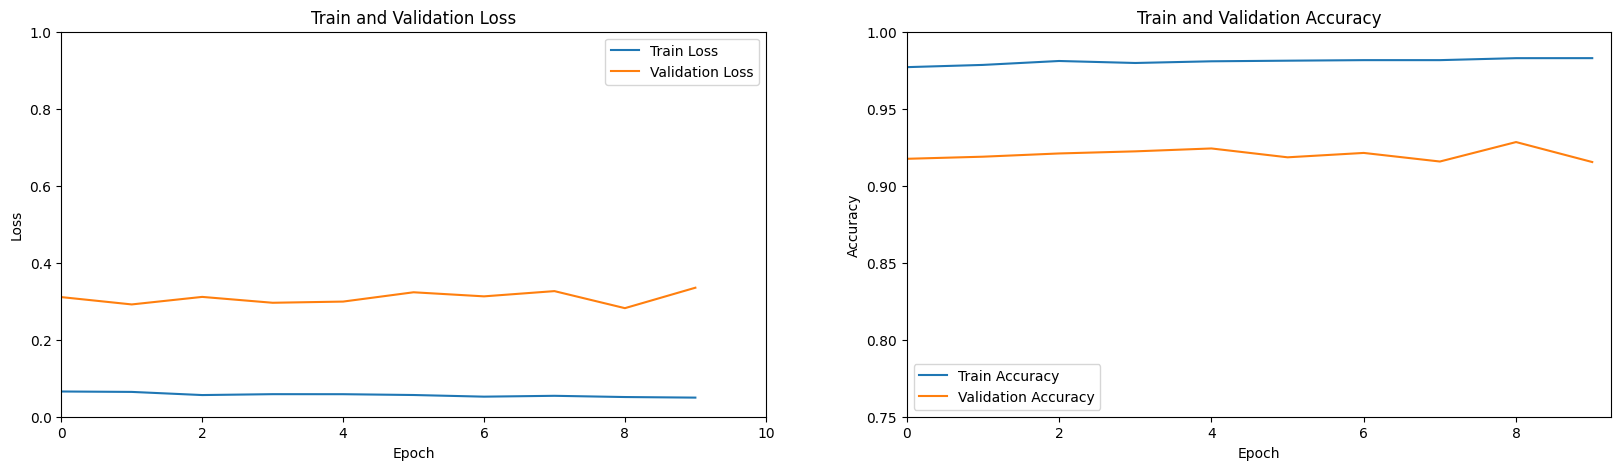

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_lstm.predict(x),1).numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.28 %
Test Accuracy   : 91.54 %
Precision Score : 91.54 %
Recall Score    : 91.54 %


Found 17572 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.
17572/17572 ━━━━━━━━━━━━━━━━━━━━ 123s 7ms/step
True Positives: [ 69  19 235   5 289   0   1  18 198   0 423   0  87   6   0   6   0 311
   2 198   0   0  67 196   0   1  79   2   0   2   5   1   0   0 148   0
 281  16]
False Positives: [ 116   90 2178   10 4107    0    3   80    9    0  260    1   41    1
    0    8    0 1505   15 2609    0    0  667 1321    1    0  154    6
    0    3    3    0    0    0  683    0 1023   13]
True Negatives: [16952 16985 14954 17060 13011 17151 17113 17082 17086 17095 16847 17099
 17051 17141 17149 17061 17113 15635 17079 14466 17087 17087 16449 15806
 17066 17138 16974 17110 17147 17089 17106 17102 17136 17137 16432 17082
 16101 17078]
False Negatives: [435 478 205 497 165 421 455 392 279 477  42 472 393 424 423 497 459 121
 476 299 485 485 389 249 505 433 365 454 425 478 458 469 436 435 309 490
 167 465]
                                                    precision 

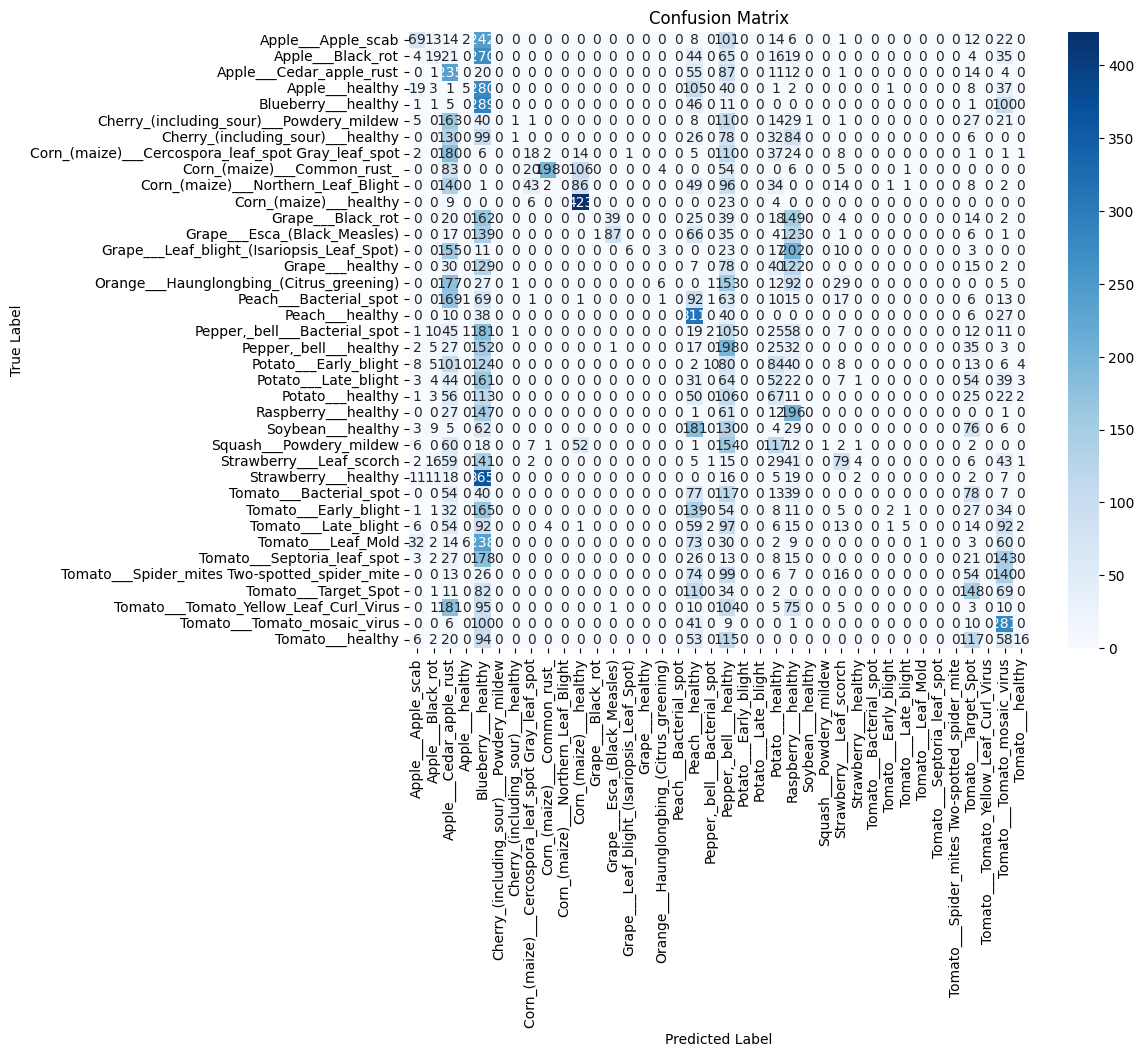

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model
model = tf.keras.models.load_model('/content/lstm_model_9833.keras')
valid='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
# Load the test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
# Get the class names
class_names = test_set.class_names

# Predict on the test set
y_pred = model.predict(test_set)
predicted_categories = np.argmax(y_pred, axis=1)

# Get the true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = np.argmax(true_categories, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Extract TP, FP, TN, FN
TP = np.diag(cm)  # True Positives
FP = np.sum(cm, axis=0) - TP  # False Positives
FN = np.sum(cm, axis=1) - TP  # False Negatives
TN = np.sum(cm) - (TP + FP + FN)  # True Negatives

print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)

# Print classification report
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


True Positives (TP): [ 69  19 235   5 289   0   1  18 198   0 423   0  87   6   0   6   0 311
   2 198   0   0  67 196   0   1  79   2   0   2   5   1   0   0 148   0
 281  16]
False Positives (FP): [ 116   90 2178   10 4107    0    3   80    9    0  260    1   41    1
    0    8    0 1505   15 2609    0    0  667 1321    1    0  154    6
    0    3    3    0    0    0  683    0 1023   13]
True Negatives (TN): [16952 16985 14954 17060 13011 17151 17113 17082 17086 17095 16847 17099
 17051 17141 17149 17061 17113 15635 17079 14466 17087 17087 16449 15806
 17066 17138 16974 17110 17147 17089 17106 17102 17136 17137 16432 17082
 16101 17078]
False Negatives (FN): [435 478 205 497 165 421 455 392 279 477  42 472 393 424 423 497 459 121
 476 299 485 485 389 249 505 433 365 454 425 478 458 469 436 435 309 490
 167 465]


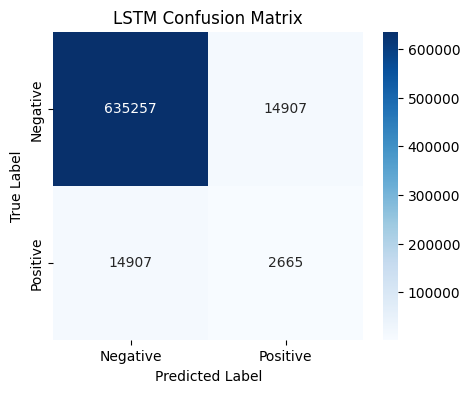

In [ ]:
cm = confusion_matrix(Y_true, predicted_categories)

# Initialize TP, FP, TN, FN for each class
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

# Summing up across all classes for overall TP, FP, TN, FN
total_TP = np.sum(TP)
total_FP = np.sum(FP)
total_TN = np.sum(TN)
total_FN = np.sum(FN)

# Confusion matrix visualization (single 2x2 box for overall results)
cm_2x2 = np.array([[total_TN, total_FP], [total_FN, total_TP]])

plt.figure(figsize=(5, 4))
sns.heatmap(cm_2x2, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LSTM Confusion Matrix')
plt.show()
